In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt2
import igraph as ig
import networkx as nx
import itertools
import math
import random
from scipy.stats import kde
from networkx.algorithms import bipartite
from sklearn import preprocessing
from sklearn.preprocessing import normalize, MinMaxScaler

## Exercício 1) Degree correlation matrix

### Using my functions

In [2]:
#calculating the degree correlation matrix

def dcm_network(g):
    nodes = g.vcount()  #taking the number of nodes
    corr_matrix = np.zeros((nodes,nodes),dtype=int) #creating the matrix with number of nodes
    
    for i in range(nodes): #iterating of all nodes
        deg_i = g.degree(i) # taking node-i degree
        neighbor_deg = [g.degree(k) for k in g.neighbors(i)]  #taking tke degrees of node-i's neighbors
        for j in neighbor_deg:  # setting in matrix the connection between i-node and its neighbors
            corr_matrix[deg_i][j] += 1  
            
    return corr_matrix

In [3]:
#plotting correlatin matrix

def plot_matrix(corr_,x,y,name_file,name_title):    
    plt.figure(figsize=(12,9))

    sns.heatmap(corr_,vmin=0, vmax=np.max(corr_),cmap="YlGnBu")
    plt.gca().invert_yaxis()
    plt.title('Degree Correlation Matrix ' + name_title)
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.xticks(rotation=45)
    plt.xlim(0,x)
    plt.ylim(0,y)
    plt.savefig(name_file, dpi=300)    
    plt.show()

In [4]:
#Reading network file

g = ig.load('metabolic.edgelist.txt')
g.to_undirected()  # converting to undirected network 

Text(0, 0.5, '$p_k$')

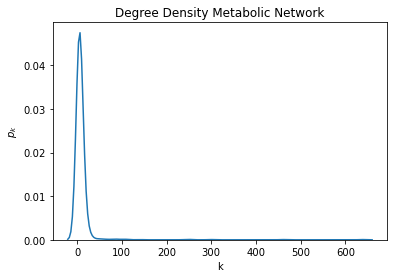

In [5]:
#checking the density of degrees

sns.kdeplot(g.degree())
plt.title('Degree Density Metabolic Network')
plt.xlabel('k')
plt.ylabel(r'$p_k$')

In [6]:
g.maxdegree()

638

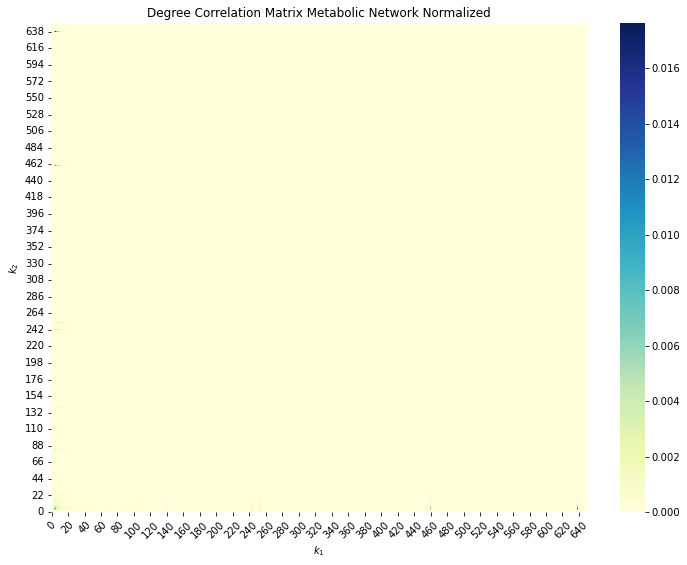

In [7]:
corr_matrix = dcm_network(g) #creating the matrix
corr_matrix_norm = corr_matrix/corr_matrix.sum() #normalizing network
plot_matrix(corr_matrix_norm,650,650,'metabolic_matrix.pdf','Metabolic Network Normalized') #plotting the matrix

#### Testing the functions with a random network

In [8]:
g_rand = ig.Graph.Erdos_Renyi(n = 300, p = 0.2, directed=False)

Text(0, 0.5, '$p_k$')

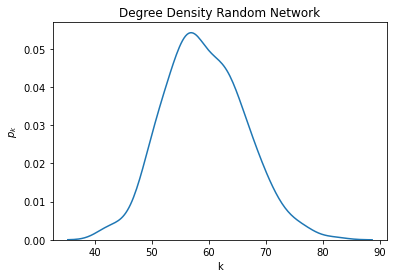

In [9]:
#checking the density of degrees

sns.kdeplot(g_rand.degree())
plt.title('Degree Density Random Network')
plt.xlabel('k')
plt.ylabel(r'$p_k$')

In [10]:
g_rand.maxdegree()

82

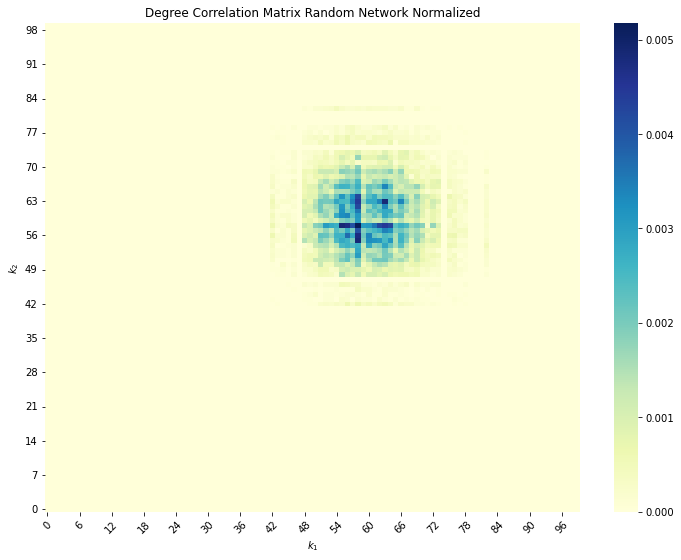

In [11]:
#testing a random network

corr_matrix_rand = dcm_network(g_rand) #creating the matrix
corr_matrix_rand_norm = corr_matrix_rand/corr_matrix_rand.sum()  #normalizing network
plot_matrix(corr_matrix_rand_norm,100,100,'random.pdf','Random Network Normalized' ) #plotting the matrix

### Using networkx function (*Professor Resolution)

In [12]:
def dcm_nx(G):
    deg = dict(nx.degree(G)) #taking the degree nodes

    nx.set_node_attributes(G, deg, 'degree')  #setting the new attributes nodes
    mix_mat = nx.attribute_mixing_matrix(G, 'degree') #generating the correlation matrix

    # plotting matrix
    
    plt.figure(figsize=(12,9))
    ax = sns.heatmap(mix_mat,vmin=0, vmax=np.max(mix_mat),cmap="YlGnBu")
    ax.invert_yaxis()
    ax.set_xlabel(r'$k_1$')
    ax.set_ylabel(r'$k_2$')
    plt.show()    

In [13]:
#reading metabolic graph

g_metabolic = nx.readwrite.edgelist.read_edgelist('metabolic.edgelist.txt')

<AxesSubplot:ylabel='Density'>

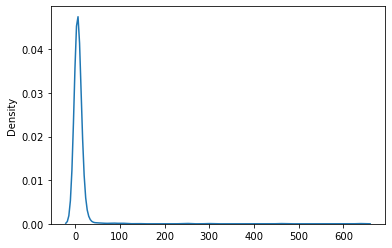

In [14]:
sns.kdeplot(list(dict(g_metabolic.degree()).values()))

In [15]:
max(dict(g_metabolic.degree()).values())

638

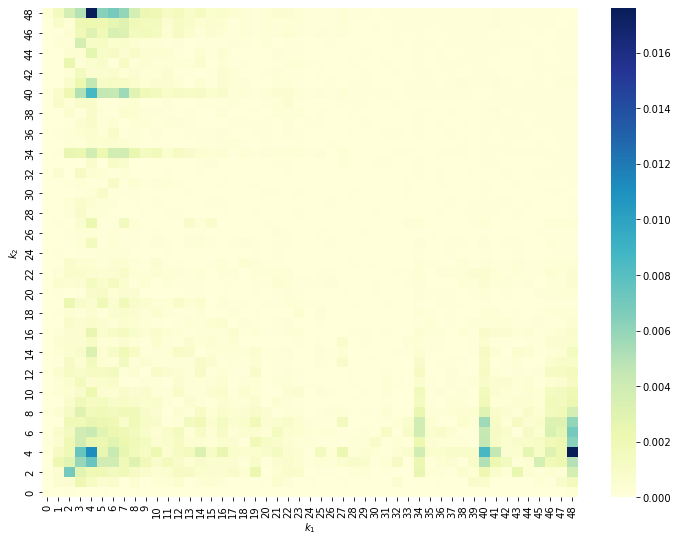

In [16]:
dcm_nx(g_metabolic)

#### Testing networkx function with a random network

In [17]:
#random network

g_random = nx.generators.random_graphs.erdos_renyi_graph(300,0.2)

<AxesSubplot:ylabel='Density'>

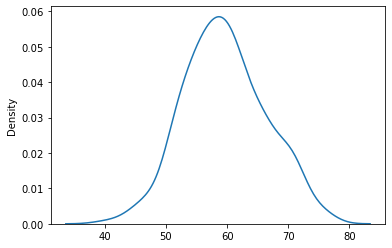

In [18]:
sns.kdeplot(list(dict(g_random.degree()).values()))

In [19]:
max(dict(g_random.degree()).values())

77

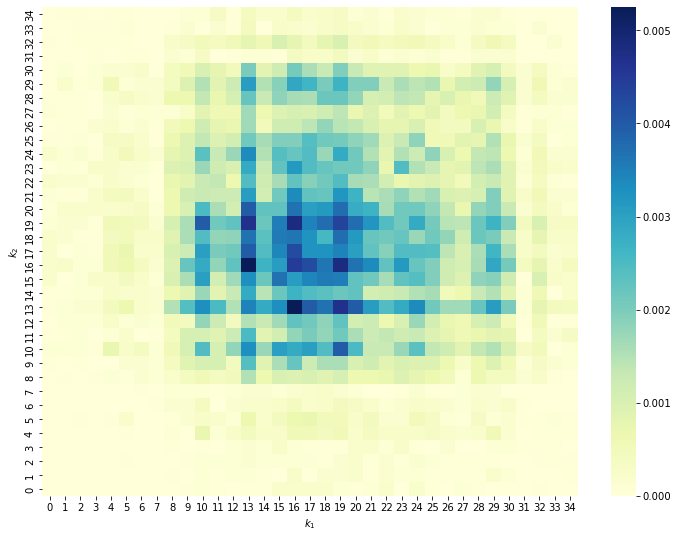

In [20]:
dcm_nx(g_random)

Neste exercício, resolvi deixar as duas abordagens para fins comparativos. 

- A primeira abordagem utiliza a contagem dos graus dos vizinhos de cada nó de forma iterativa;
- A segunda abordagem utiliza o networkx com a proposta sugerida pelo professor;

+ Um ponto de diferença foi no range dos valores dos eixos $x$ e $y$. Na primeira abordagem, os valores ficam mais fidedignos em relação aos graus dos nós, de acordo com a análise de distribuição de graus. Para a rede metabólica, percebe-se uma concentração de graus entre $0$ e $\approx 50$, mas há também nós com graus mais elevados. Por exemplo, há um nó com grau $638$, o grau máximo da rede. Na segunda abordagem utilizando networkx, os valores dos eixos vão até $48$ para a rede metabólica. Não entendi esse comportamento. O mesmo acontece para a rede aleatória Erdos Renyi. Na primeira abordagem, a concentração de graus está entre $\approx 40$ e $\approx 80$ e a matriz mostra essa concentração pela nuvem de correlação. Já na segunda abordagem com networkx, a matriz apresenta valores dos eixos até $35$.

## Exercício 2 Page Rank

### Trying newark network with networkx

In [21]:
#loading the network

g_n = nx.read_graphml('3649891_Newark.graphml')

In [22]:
#normalizing a list

def normalize_list(arr, t_min, t_max):
    #t_min and t_max control the range of nodes' sizes
    
    min_size = min(arr) #min of array
    max_size = max(arr) #max of array
    
    arr_ = t_min + ((arr - min_size) / (max_size - min_size)) * (t_max - t_min) #normalization
    return arr_

In [23]:
#calculating the page rank

g_n_pagerank = nx.pagerank_numpy(g_n) 
print(g_n_pagerank)

{'221508755': 0.0030097571448615915, '221508756': 0.0024532184446026057, '221508761': 0.0025843305411017343, '221508767': 0.002761822801082585, '221508771': 0.0039898086991207015, '221508785': 0.003163105979190446, '221508789': 0.0037935466726258626, '221508801': 0.0028752611473013704, '221509512': 0.00281720549232599, '221509520': 0.002829767728998172, '221509534': 0.002899774321647268, '221509941': 0.003854620397092686, '221509944': 0.001503891004722971, '221510076': 0.0027373805438349755, '221510079': 0.0028846380951609227, '221510083': 0.0028636909397668302, '221510091': 0.002487336883648261, '221510789': 0.0031707228588523702, '221510794': 0.002936117038846331, '221510937': 0.002773740512740574, '221510997': 0.002960715470049099, '221511007': 0.0028866034100692196, '221511011': 0.0028220581057080167, '221511111': 0.0028466309483477477, '221511591': 0.0029599520552349027, '221511597': 0.003855084141158009, '221511600': 0.002903758614992109, '221511612': 0.003936011002625846, '22151

In [24]:
#normalizing the page rank

norm_page = normalize_list(np.array(list(g_n_pagerank.values())),1,500) 

<AxesSubplot:ylabel='Density'>

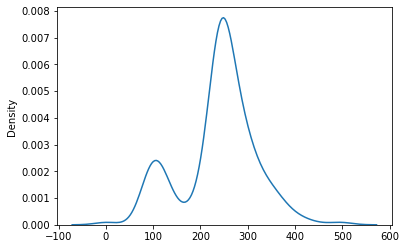

In [25]:
sns.kdeplot(norm_page)

Text(0.5, 1.0, 'PageRank')

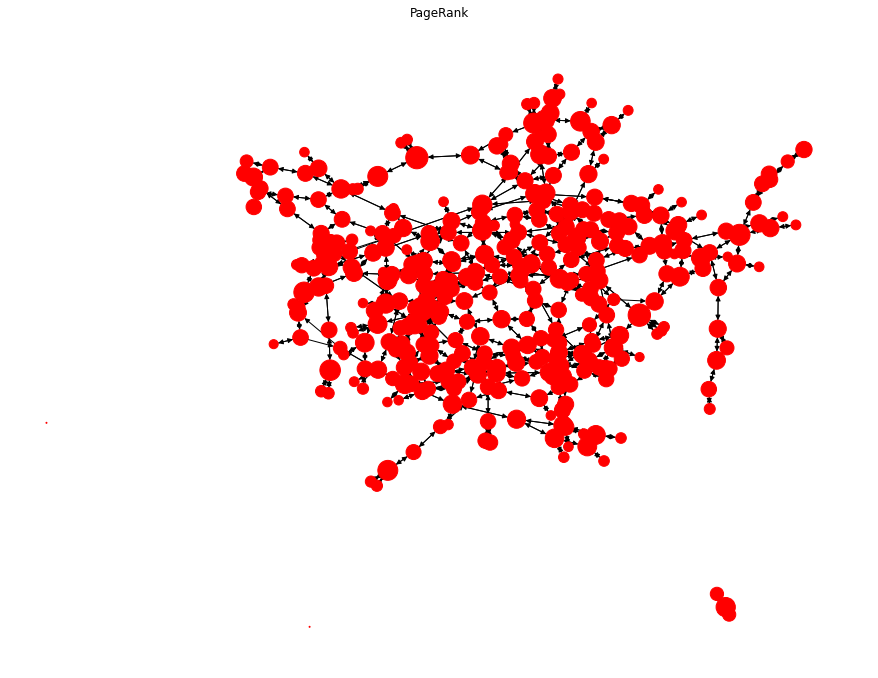

In [26]:
#plotting the page rank

plt.figure(figsize=(12,9))  
nx.draw(g_n, node_size=norm_page, node_color='red') #drawing the network
plt.title('PageRank')

Text(0.5, 1.0, 'PageRank')

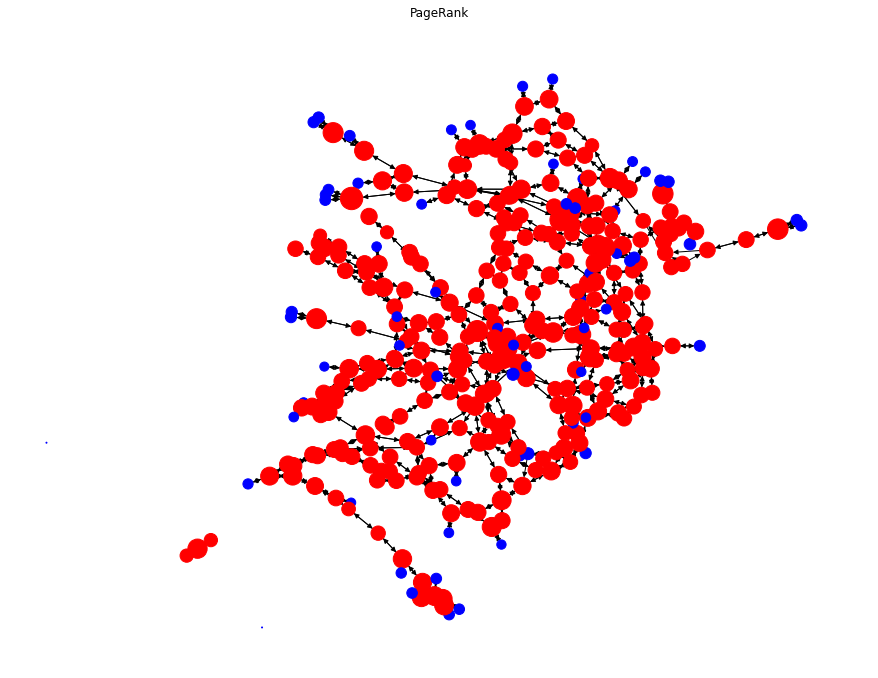

In [27]:
#plotting the page rank

plt.figure(figsize=(12,9))  

#setting the color nodes following pagerank number
#pagerank below 150 is blue, above 150 is red
color_nodes = ['blue' if i<150 else 'red' for i in norm_page] 

nx.draw(g_n, node_size=norm_page, node_color=color_nodes) #drawing the network
plt.title('PageRank')

O tamanho dos nós no plot do networkx para a rede Newark não está tão bom. Conforme foi discutido com o professor, esta rede não é plotada pelo igraph. Tentei aumentar a proporcionalidade dos tamanhos, porém não consegui. Mesmo assim, é possível perceber a diferença no tamanho dos nós de acordo com o pagerank. No igraph, essa proporção é mais visível. Para dar mais destaque, plotei um gráfico diferenciando nós com pagerank acima de 150 (vermelho) e abaixo de 150 (azuis). Esse valor foi escolhido aleatoriamente.

### Trying metabolic network with igraph

In [28]:
g_newark = ig.load('metabolic.edgelist.txt')

In [29]:
g_newark_pg = ig.Graph.pagerank(g_newark)
print(g_newark_pg)

[0.0010092378003682281, 0.00026476566882737985, 0.00026319183794394613, 0.00026714081823507406, 0.0002658309776336686, 0.00037569844951530204, 0.00028639094274712367, 0.0003974019983791228, 0.00112383215028219, 0.0006081944927569025, 0.0016095337716556385, 0.00023754109452994672, 0.00044123148746366773, 0.00031131270756579947, 0.0003111105875928997, 0.00031094121187340556, 0.0002912827692647918, 0.00026666195611770325, 0.0003102930949675892, 0.0002662501641565393, 0.0002540626716077939, 0.0002539553577157419, 0.0002538502492600141, 0.0002471198783149491, 0.00024516318602729655, 0.00025343612338079354, 0.00024478751331303037, 0.0004931452925563909, 0.0004983336461500518, 0.0005049651505764954, 0.0007089962674373781, 0.0006991049737279338, 0.000602011663302557, 0.0005158010550606468, 0.00047819311564473047, 0.00016549024093864427, 0.00016549024093864427, 0.00016549024093864427, 0.00016549024093864427, 0.0003591111165234059, 0.0007329653634671785, 0.0007681138239560672, 0.0005559944161485

In [30]:
g_newark_pg_norm = normalize_list(np.array(g_newark_pg),2,15)
g_newark_pg_norm

array([2.14623989, 2.0172066 , 2.01693382, ..., 2.01798755, 2.0600115 ,
       2.04604672])

In [31]:
g_newark.vs["size"] = g_newark_pg_norm.tolist()
g_newark.vs["label_size"] = 2

# create plotting styles
visual_style = {}
visual_style["vertex_size"] = g_newark.vs["size"]
#visual_style["edge_width"] = 0.2
visual_style["layout"] = g_newark.layout_drl()
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 30

ig.plot(g_newark, **visual_style)